<a href="https://colab.research.google.com/github/tobyzawthuhtet/landuse_landcover_classification_with_deep_learning/blob/main/Copy_of_landuse_land_cover_classification_landsat8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyrsgis

In [ ]:
import os
import numpy as np
from tensorflow import keras
from pyrsgis import raster
from pyrsgis.convert import changeDimension
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import glob

Warning! matplotlib_scalebar library not found. You may not be able to export map directly.


In [ ]:
os.chdir('/content/drive/MyDrive/Ukraine Urban Extraction Project')

In [ ]:
data = glob.glob("*.tif")
for i in data:
  print(i)

training_data.tif
training_lable.tif
testing_data.tif
Test_predicted.tif
Test_predicted1.tif


In [ ]:
mxTrain= 'training_data.tif'
builtupTrain = 'training_lable.tif'
mxTest = 'testing_data.tif'

In [ ]:
ds1, featuresTrain = raster.read(mxTrain, bands='all')
ds2, labelTrain = raster.read(builtupTrain, bands=1)
ds3, featuresTest = raster.read(mxTest, bands='all')


In [ ]:
print("Train Multispectral image shape: ", featuresTrain.shape)
print("Train Label Binary built-up image shape: ", labelTrain.shape)
print("Test Multispectral image shape: ", featuresTest.shape)

Train Multispectral image shape:  (10, 73, 277)
Train Label Binary built-up image shape:  (73, 277)
Test Multispectral image shape:  (10, 71, 277)


In [ ]:
labelTrain = (labelTrain == 1).astype(int)

In [ ]:
featuresTrain = changeDimension(featuresTrain)
labelTrain = changeDimension (labelTrain)
featuresTest = changeDimension(featuresTest)
nBands = featuresTrain.shape[1]


In [ ]:
print("Train Multispectral image shape: ", featuresTrain.shape)
print("Train Label Binary built-up image shape: ", labelTrain.shape)
print("Test Multispectral image shape: ", featuresTest.shape)


Train Multispectral image shape:  (20221, 10)
Train Label Binary built-up image shape:  (20221,)
Test Multispectral image shape:  (19667, 10)


In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(featuresTrain, labelTrain, test_size=0.4, random_state=42)


In [ ]:
print(xTrain.shape)
print(yTrain.shape)

print(xTest.shape)
print(yTest.shape)

(12132, 10)
(12132,)
(8089, 10)
(8089,)


In [ ]:
xTrain = xTrain / 255.0
xTest = xTest / 255.0
featuresTest  = featuresTest / 255.0
print(featuresTest.shape)

(19667, 10)


In [ ]:
xTrain = xTrain.reshape((xTrain.shape[0], 1, xTrain.shape[1]))
xTest = xTest.reshape((xTest.shape[0], 1, xTest.shape[1]))
featuresTest = featuresTest.reshape((featuresTest.shape[0], 1, featuresTest.shape[1]))


In [ ]:
print(xTrain.shape, xTest.shape, featuresTest.shape)

(12132, 1, 10) (8089, 1, 10) (19667, 1, 10)


In [ ]:
model = keras.Sequential([
                        Flatten(input_shape=(1,nBands)),
                        Dense(10, activation='relu'),
                        Dense(2,activation='softmax')
                          
])

Epoch 1/15
266/266 - 1s - loss: 0.5448 - accuracy: 0.8188 - val_loss: 0.4934 - val_accuracy: 0.8255
Epoch 2/15
266/266 - 0s - loss: 0.4815 - accuracy: 0.8188 - val_loss: 0.4530 - val_accuracy: 0.8255
Epoch 3/15
266/266 - 0s - loss: 0.4556 - accuracy: 0.8188 - val_loss: 0.4375 - val_accuracy: 0.8255
Epoch 4/15
266/266 - 0s - loss: 0.4465 - accuracy: 0.8188 - val_loss: 0.4323 - val_accuracy: 0.8255
Epoch 5/15
266/266 - 0s - loss: 0.4437 - accuracy: 0.8188 - val_loss: 0.4305 - val_accuracy: 0.8255
Epoch 6/15
266/266 - 0s - loss: 0.4429 - accuracy: 0.8188 - val_loss: 0.4301 - val_accuracy: 0.8255
Epoch 7/15
266/266 - 0s - loss: 0.4427 - accuracy: 0.8188 - val_loss: 0.4299 - val_accuracy: 0.8255
Epoch 8/15
266/266 - 0s - loss: 0.4427 - accuracy: 0.8188 - val_loss: 0.4299 - val_accuracy: 0.8255
Epoch 9/15
266/266 - 0s - loss: 0.4427 - accuracy: 0.8188 - val_loss: 0.4299 - val_accuracy: 0.8255
Epoch 10/15
266/266 - 0s - loss: 0.4427 - accuracy: 0.8188 - val_loss: 0.4299 - val_accuracy: 0.8255

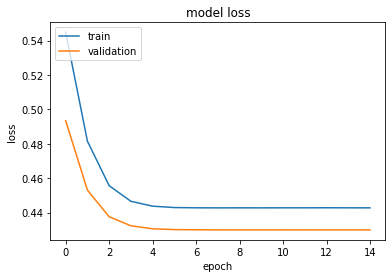

<Figure size 432x288 with 0 Axes>

In [ ]:

model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# Run the model
history = model.fit(xTrain, yTrain , validation_split=0.3, epochs=15, verbose=2)

print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.savefig('Model loss.jpg')

In [ ]:
model = keras.Sequential([
   keras.layers.Flatten(input_shape=(1, nBands)),
   keras.layers.Dense(16, activation='relu'),
   keras.layers.Dense(2, activation='softmax')])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


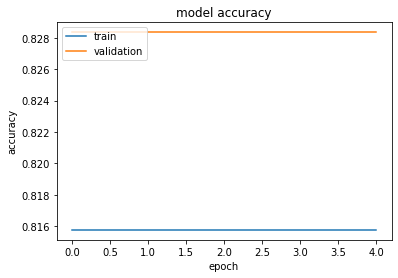

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
#plt.savefig('Model Accuracy.jpg')

In [ ]:
os.getcwd()

'/content/drive/My Drive/Ukraine Urban Extraction Project'

In [ ]:
yTestPredicted = model.predict(xTest)
yTestPredicted = yTestPredicted[:,1]

In [ ]:
yTestPredicted = (yTestPredicted>0.5).astype(int)
cMatrix = confusion_matrix(yTest, yTestPredicted)
pScore = precision_score(yTest, yTestPredicted)
rScore = recall_score(yTest, yTestPredicted)
print("Confusion matrix: for 14 nodes\n", cMatrix)
print("\nP-Score: %.3f, R-Score: %.3f" % (pScore, rScore))


Confusion matrix: for 14 nodes
 [[6660    0]
 [1429    0]]

P-Score: 0.000, R-Score: 0.000


In [ ]:
predicted = model.predict(featuresTest)
predicted = predicted[:,1]

In [ ]:
prediction = np.reshape(predicted, (ds3.RasterYSize, ds3.RasterXSize))
outFile = 'Test_predicted1.tif'
raster.export(prediction, ds3, filename=outFile, dtype='float')

In [ ]:
ls

'Model Accuracy.jpg'   Test_predicted1.tif   training_lable.tif
'Model loss.jpg'       Test_predicted.tif
 testing_data.tif      training_data.tif
